# χ-ε relations

## Motivation

Is $K_T = K_ρ$ at 5-m scale a good assumption in spicy regions? We make this assumption to relate $χ_T$ ($K_T$) to $ε$ ($K_ρ$)
1. We have some observations of $K_T \sim O(1)  K_S$ (Nash & Moum, 2002) 
2. $ρ = f(T, S)$ and T, S anomalies can compensate each other, i.e. you can have $T$ anomalies that are passive and not connected to the energy budget, so one might suspect that it's possible to get a larger $χ_T$ for the same $ε$ when T-S compensation is present vs absent

An alternative way to formulate the $χ$-$ε$ relation is to use energetics (connected to point 2) as in Gregg (1987); Seim & Gregg (1994); Alford & Pinkel (2000). Gergg (1987)' equation (56) is the evolution equation for $ρ'$
\begin{equation}
\frac{d\overline{ρ'^2}}{dt} + 2 \overline{ρ'u'} \frac{∂\overline{ρ}}{∂z} = - χ_ρ
\end{equation}

Then form an equation for perturbation potential energy $η$
\begin{align}
η &≡ \frac 12 \left( \frac{g}{ρN} \right)^2 \overline{ρ'^2} \\
\frac{dη}{dt} &= -J_b - \frac 12 χ_{pe}
\end{align}

This shows the connection between $ε$ ($J_b$) and $χ_{pe}$ (tied to $χ_ρ$ which should be related to $χ_T$ and $χ_S$).
\begin{align}
χ_{pe} &= \left(\frac{g}{ρN}\right)^2 χ_ρ
\end{align}

-----

### What is $χ_ρ$
Now $χ_T$ and $χ_S$ are "easy" to define (assuming isotropy):
\begin{equation}
χ_T = 6 D_T \overline{\left(\frac{∂T'}{∂z}\right)^2} \qquad χ_S = 6 D_S \overline{\left(\frac{∂S'}{∂z}\right)^2}
\end{equation}
where $D_S, D_T$ are molecular diffusivities for $S$, $T$.

We cannot simply write $χ_ρ = 6 \ D_ρ (∂ρ'/∂z)^2$: What is the "molecular diffusivity" of density? Instead $χ_ρ$ must be the positive-definite dissipation term in the evolution equation of $\overline{ρ'^2}$ derived from those for $\overline{T'^2}$ and $\overline{S'^2}$ 

-----

### Approach of Gregg (1987)

Gregg (1987) writes
\begin{align}
χ_{pe} &= \left(\frac{g}{ρN}\right)^2 χ_ρ \\
       &= \left(\frac{gα}{N}\right)^2 χ_T + \left(\frac{gβ}{N}\right)^2 χ_S \qquad\qquad \text{assumption!} \\
       &= \left(\frac{gα}{N}\right)^2 \left( 1 + \frac{1}{R_ρ^2} \right) χ_T; \qquad R_ρ = \frac{-αT_z}{βS_z} 
\end{align}


This must assume that $T'$ and $S'$ are uncorrelated. As Nash & Moum (1999) show, microconductivity observations (which is a different function of $T, S$) can have a very different spectral shape depending on the coherence between $T'$, $S'$ (see below)


Assuming equililbrium energetics $χ_{pe} = 2Γε$ yields a $ε-χ_T$ relationship, that we can then write as a $K_T -K_ρ$ relationship


\begin{align}
    2Γε &= \left(\frac{gα}{N}\right)^2 \left( 1 + \frac{1}{R_ρ^2} \right) χ_T \\
    \frac{Γε}{N^2} &= \left(\frac{gα}{N}\right)^2 \left( 1 + \frac{1}{R_ρ^2} \right) \frac{χ_T/2}{T_z^2} \frac{T_z^2}{N^2}\\
    K_ρ &= \left(\frac{gαT_z}{N^2}\right)^2 \left( 1 + \frac{1}{R_ρ^2} \right) K_T \\
    K_ρ &= \left(1 + \frac{1}{R_ρ}\right)^{-2} \left( 1 + \frac{1}{R_ρ^2} \right) K_T \\
    K_ρ &= \frac{1 + R_ρ^2}{(1 + R_ρ)^2} K_T \\
    ε & = \frac{1 + R_ρ^2}{(1 + R_ρ)^2} \frac{N^2χ_T}{2ΓT_z^2}
\end{align}

Some properties:
1. This blows up at $R_ρ=-1 ⇒ αT_z = βS_z$ because then $N^2 = gαT_z - gβS_z = 0$, so the gradients perfectly cancel each other. THe $ε$ equation is undefined (infinity x 0) but I think it's saying $χ_T$ does not tell us anything about $ε$ since $T$ is totally disconnected from the energetics.
2. If $S_z = 0$, then $K_T=K_ρ$ after rewriting to
\begin{equation}
K_ρ = \frac{(βS_z)^2 + (αT_z)^2}{(βS_z - αT_z)^2} K_T
\end{equation}

**What is $R_ρ$ for NATRE?** [right] Here's the average of $R_ρ$ along P surfaces across all profiles.

In [35]:
Rρ = np.arange(-5, 5, 0.05)
fxn = (1 + Rρ**2) / (1 + Rρ) ** 2

curve = hv.Curve((Rρ, fxn)).opts(
    ylim=(0, 10), show_grid=True, ylabel="K_ρ/K_T", xlabel="Rρ"
) * (hv.VLine(-1).opts(color="k") * hv.HLine(1).opts(color="k"))

natre_Rρ = (
    natre.Rρ.sel(pres=slice(250, None))
    .where(np.abs(natre.Rρ) < 100)
    .mean(["latitude", "longitude"])
    .reset_coords(drop=True)
    .hvplot(label="NATRE")
).opts(show_grid=True) * (
    hv.HLine(0).opts(line_width=0.5, color="k")
    * hv.HLine(-2).opts(line_width=0.5, color="k")
)

curve + natre_Rρ

:Layout
   .Overlay.I     :Overlay
      .Curve.I :Curve   [x]   (y)
      .VLine.I :VLine   [x,y]
      .HLine.I :HLine   [x,y]
   .Overlay.NATRE :Overlay
      .Curve.NATRE :Curve   [pres]   (Rρ)
      .HLine.I     :HLine   [x,y]
      .HLine.II    :HLine   [x,y]

### Deriving $χ_ρ$

Really really messy!


### What is the spectra of $ρ'_z$

Following Nash & Moum (1999)
\begin{align}
ρ_z &= - ρ_0 α T_z+ ρ_0 β S_z \\
ψ_{ρz} &= (ρ_0 α)^2 ψ_{Tz} - 2 ρ_0^2 αβψ_{TzSz} + (ρ_0 β)^2 ψ_{Sz}
\end{align}
and
cospectrum can be expressed using coherence $γ_{TzSz}(k)$ and phase $φ(k)$
\begin{equation}
ψ_{TzSz} = γ_{TzSz}(k) e^{iφ(k)} [ψ_{Tz}ψ_{Sz}]^{1/2}
\end{equation}

In general if $T_z$ and $S_z$ are correlated then the cross-term is not negligible. Here we test this idea assuming perfect coherence amplitude, and either in-phase or 180° out-of-phase.



In [213]:
# check that we recover χ
6 * DT * xr.DataArray(
    kraichnan(chi=1e-8, D=DT, **kwargs), dims="k", coords={"k": k}
).integrate("k").data

1.007453254060001e-08

In [40]:
def calculate_quantities(χT, χS, ε, N):
    from dcpy.oceans import kraichnan

    DT = 1.5e-7
    DS = 1.5e-9
    ν = 1e-6

    α = 1.7e-4
    β = 7.6e-4
    ρ0 = 1025
    Γ = 0.2
    g = -9.81

    γ = 1
    # φ = 0

    k = np.logspace(-4, 5, 101)
    kwargs = dict(k=k, eps=ε, nu=ν)
    Ψ = DataTree.from_dict(
        {
            "scalar": xr.Dataset(
                {
                    "Tz": ("k", kraichnan(**kwargs, chi=χT, D=DT)),
                    "Sz": ("k", kraichnan(**kwargs, chi=χS, D=DS)),
                },
                coords={"k": k, "χT": χT, "χS": χS, "ε": kwargs["eps"]},
            )
        }
    )

    ψ = Ψ["scalar"].ds
    Ψρ = xr.Dataset()
    Ψρ["Tz"] = (ρ0 * α) ** 2 * ψ.Tz
    Ψρ["SzTz"] = (2 * ρ0 * α * ρ0 * β * γ * np.sqrt(ψ.Tz * ψ.Sz)).real
    Ψρ["Sz"] = (ρ0 * β) ** 2 * ψ.Sz

    Ψρ["ρz"] = Ψρ["Tz"] + Ψρ["SzTz"] + Ψρ["Sz"]
    Ψρ["ρz"].attrs["long_name"] = "$Ψ_{ρz}, φ=π$"

    Ψρ["ρz_neg"] = Ψρ["Tz"] - Ψρ["SzTz"] + Ψρ["Sz"]
    Ψρ["ρz_neg"].attrs["long_name"] = "$Ψ_{ρz}, φ=0$"

    Ψ["rho"] = DataTree(Ψρ)
    Ψint = Ψ.integrate("k").reset_coords(drop=True)

    ###### Crazy assumption
    Dρ = DS

    turb = xr.Dataset()
    turb["χT"] = 6 * DT * Ψint["scalar"]["Tz"]
    turb["χS"] = 6 * DS * Ψint["scalar"]["Sz"]
    turb["χρ"] = 6 * Dρ * Ψint["rho"]["ρz"]
    turb["χρ_neg"] = 6 * Dρ * Ψint["rho"]["ρz_neg"]
    turb["χpe"] = (g / ρ0 / N) ** 2 * turb.χρ
    turb["χpe_neg"] = turb.χρ_neg

    turb["ε"] = 1 / 2 / Γ * turb.χpe
    turb["ε_neg"] = 1 / 2 / Γ * turb.χpe_neg

    Ψ["turb"] = DataTree(turb)

    return Ψ

In [41]:
Ψ = calculate_quantities(χT=1e-8, χS=1e-10, ε=1e-8, N=1e-2)

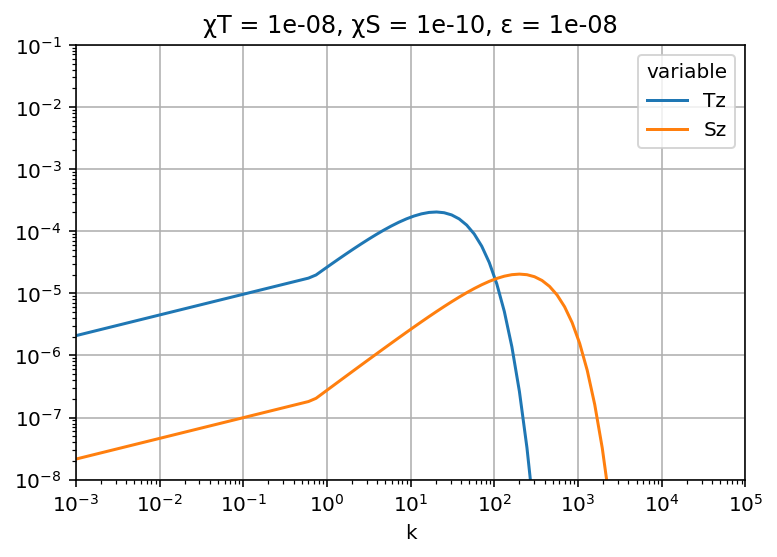

In [42]:
Ψ["scalar"].ds.to_array().plot(
    hue="variable", xscale="log", yscale="log", ylim=(1e-8, 1e-1), xlim=(1e-3, 1e5)
)
plt.grid(True)

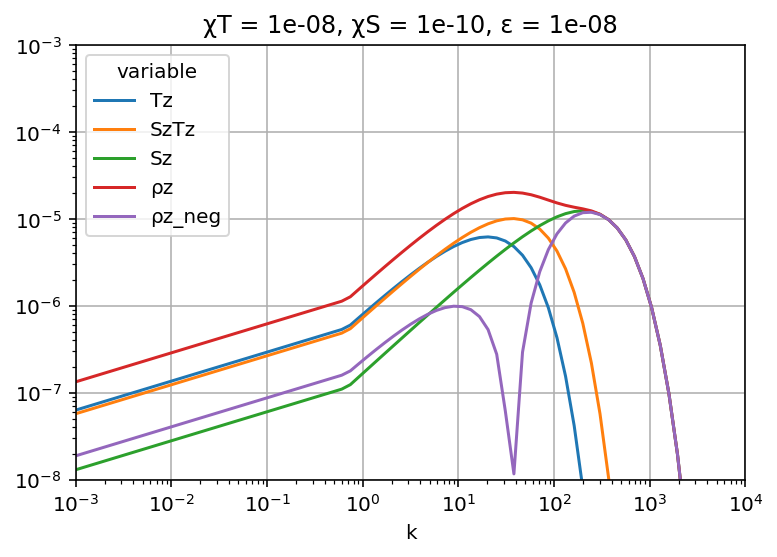

In [43]:
plt.figure()
Ψ["rho"].ds.to_array().plot(
    hue="variable", xscale="log", yscale="log", ylim=(1e-8, 1e-3), xlim=(1e-3, 1e4)
)
plt.grid(True)

We recover $χ_T, χ_S$. Interestingly, `χpe` and `χpe_neg` are not that different (20%) so perhaps this isn't too bad an assumption?

In [45]:
display(Ψ["turb"])
display(Ψ["rho"])

DataTree('turb', parent="None")
    Dimensions:  ()
    Data variables:
        χT       float64 1.007e-08
        χS       float64 1.007e-10
        χρ       float64 7.322e-11
        χρ_neg   float64 5.514e-11
        χpe      float64 6.707e-11
        χpe_neg  float64 5.514e-11
        ε        float64 1.677e-10
        ε_neg    float64 1.378e-10

DataTree('rho', parent="None")
    Dimensions:  (k: 101)
    Coordinates:
      * k        (k) float64 0.0001 0.000123 0.0001514 ... 6.607e+04 8.128e+04 1e+05
        χT       float64 1e-08
        χS       float64 1e-10
        ε        float64 1e-08
    Data variables:
        Tz       (k) float64 2.932e-08 3.141e-08 3.366e-08 3.607e-08 ... 0.0 0.0 0.0
        SzTz     (k) float64 2.662e-08 2.852e-08 3.056e-08 3.275e-08 ... 0.0 0.0 0.0
        Sz       (k) float64 6.043e-09 6.475e-09 6.938e-09 ... 1.217e-178 4.33e-219
        ρz       (k) float64 6.198e-08 6.641e-08 7.116e-08 ... 1.217e-178 4.33e-219
        ρz_neg   (k) float64 8.739e-09 9.364e-09 1.003e-08 ... 1.217e-178 4.33e-219